In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
path = "./data/vibrate"

In [58]:
sensor1 = pd.read_csv(path+'/g1_sensor1.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])
sensor2 = pd.read_csv(path+'/g1_sensor2.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])
sensor3 = pd.read_csv(path+'/g1_sensor3.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])
sensor4 = pd.read_csv(path+'/g1_sensor4.csv', names = ['time', 'normal', 'type1', 'type2', 'type3'])

In [59]:
print('sensor 1의 데이터 크기', sensor1.shape)
print('sensor 2의 데이터 크기', sensor2.shape)
print('sensor 3의 데이터 크기', sensor3.shape)
print('sensor 4의 데이터 크기', sensor4.shape)

sensor 1의 데이터 크기 (190218, 5)
sensor 2의 데이터 크기 (184211, 5)
sensor 3의 데이터 크기 (196079, 5)
sensor 4의 데이터 크기 (183969, 5)


In [60]:
from scipy import interpolate
x_new = np.arange(0, 140, 0.001)
y_new1 = []; y_new2 = []; y_new3 = []; y_new4 = []
for item in ['normal', 'type1', 'type2', 'type3']:
    f_linear1 = interpolate.interp1d(sensor1['time'], sensor1[item], kind='linear');
    f_linear2 = interpolate.interp1d(sensor2['time'], sensor2[item], kind='linear')
    f_linear3 = interpolate.interp1d(sensor3['time'], sensor3[item], kind='linear');
    f_linear4 = interpolate.interp1d(sensor4['time'], sensor4[item], kind='linear');

    y_new1.append(f_linear1(x_new))
    y_new2.append(f_linear2(x_new))
    y_new3.append(f_linear3(x_new))
    y_new4.append(f_linear4(x_new))

sensor1 = pd.DataFrame(np.array(y_new1).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor2 = pd.DataFrame(np.array(y_new2).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor3 = pd.DataFrame(np.array(y_new3).T, columns = ['normal', 'type1', 'type2', 'type3'])
sensor4 = pd.DataFrame(np.array(y_new4).T, columns = ['normal', 'type1', 'type2', 'type3'])

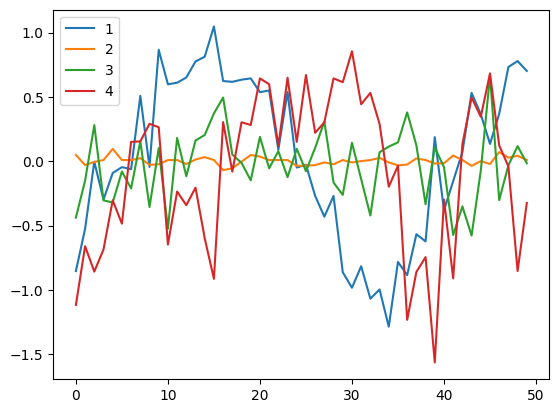

In [61]:
plt.plot(sensor1[sensor1.columns[0]].iloc[:50],label = 1)
plt.plot(sensor2[sensor2.columns[0]].iloc[:50],label = 2)
plt.plot(sensor3[sensor3.columns[0]].iloc[:50],label = 3)
plt.plot(sensor4[sensor4.columns[0]].iloc[:50],label = 4)
plt.legend()
plt.show()

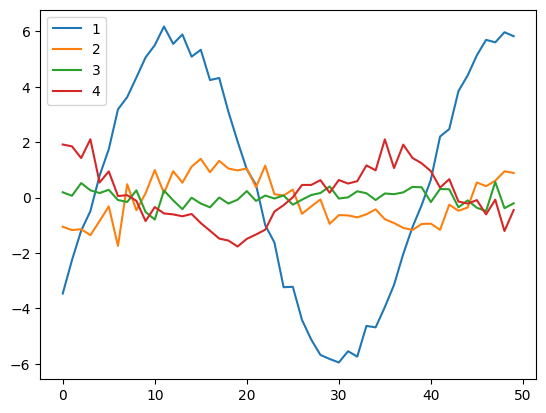

In [62]:
plt.plot(sensor1[sensor1.columns[1]].iloc[:50],label = 1)
plt.plot(sensor2[sensor2.columns[1]].iloc[:50],label = 2)
plt.plot(sensor3[sensor3.columns[1]].iloc[:50],label = 3)
plt.plot(sensor4[sensor4.columns[1]].iloc[:50],label = 4)
plt.legend()
plt.show()

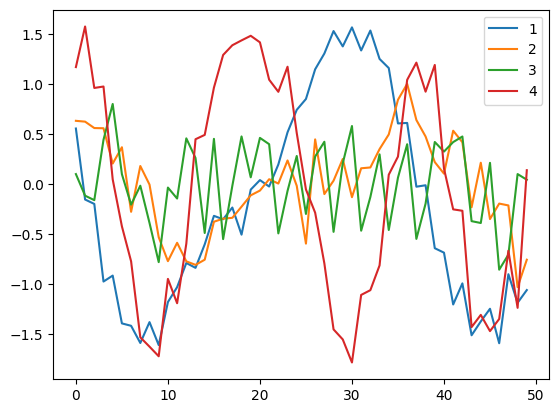

In [63]:
plt.plot(sensor1[sensor1.columns[2]].iloc[:50],label = 1)
plt.plot(sensor2[sensor2.columns[2]].iloc[:50],label = 2)
plt.plot(sensor3[sensor3.columns[2]].iloc[:50],label = 3)
plt.plot(sensor4[sensor4.columns[2]].iloc[:50],label = 4)
plt.legend()
plt.show()

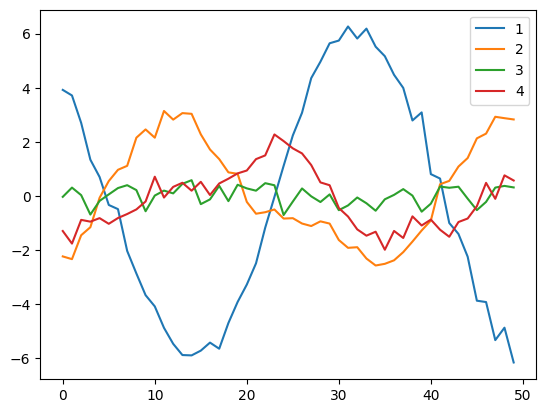

In [64]:
plt.plot(sensor1[sensor1.columns[3]].iloc[:50],label = 1)
plt.plot(sensor2[sensor2.columns[3]].iloc[:50],label = 2)
plt.plot(sensor3[sensor3.columns[3]].iloc[:50],label = 3)
plt.plot(sensor4[sensor4.columns[3]].iloc[:50],label = 4)
plt.legend()
plt.show()

In [65]:
normal_ = pd.concat([sensor1['normal'], sensor2['normal'], sensor3['normal'],
sensor4['normal']], axis=1)
type1_ = pd.concat([sensor1['type1'], sensor2['type1'], sensor3['type1'],
sensor4['type1']], axis=1)
type2_ = pd.concat([sensor1['type2'], sensor2['type2'], sensor3['type2'],
sensor4['type2']], axis=1)
type3_ = pd.concat([sensor1['type3'], sensor2['type3'], sensor3['type3'],
sensor4['type3']], axis=1)
normal_.columns = ['s1', 's2', 's3', 's4']; type1_.columns = ['s1', 's2', 's3', 's4']
type2_.columns = ['s1', 's2', 's3', 's4']; type3_.columns = ['s1', 's2', 's3', 's4']

In [66]:
M =15
normal_s1 = np.convolve(normal_['s1'], np.ones(M), 'valid') / M; normal_s1 = normal_s1.reshape(len(normal_s1),1)
normal_s2 = np.convolve(normal_['s2'], np.ones(M), 'valid') / M; normal_s2 = normal_s2.reshape(len(normal_s2),1)
normal_s3 = np.convolve(normal_['s3'], np.ones(M), 'valid') / M; normal_s3 = normal_s3.reshape(len(normal_s3),1)
normal_s4 = np.convolve(normal_['s4'], np.ones(M), 'valid') / M; normal_s4 = normal_s4.reshape(len(normal_s4),1)
type1_s1 = np.convolve(type1_['s1'], np.ones(M), 'valid') / M; type1_s1 = type1_s1.reshape(len(type1_s1),1)
type1_s2 = np.convolve(type1_['s2'], np.ones(M), 'valid') / M; type1_s2 = type1_s2.reshape(len(type1_s2),1)
type1_s3 = np.convolve(type1_['s3'], np.ones(M), 'valid') / M; type1_s3 = type1_s3.reshape(len(type1_s3),1)
type1_s4 = np.convolve(type1_['s4'], np.ones(M), 'valid') / M; type1_s4 = type1_s4.reshape(len(type1_s4),1)
type2_s1 = np.convolve(type2_['s1'], np.ones(M), 'valid') / M; type2_s1 = type2_s1.reshape(len(type2_s1),1)
type2_s2 = np.convolve(type2_['s2'], np.ones(M), 'valid') / M; type2_s2 = type2_s2.reshape(len(type2_s2),1)
type2_s3 = np.convolve(type2_['s3'], np.ones(M), 'valid') / M; type2_s3 = type2_s3.reshape(len(type2_s3),1)
type2_s4 = np.convolve(type2_['s4'], np.ones(M), 'valid') / M; type2_s4 = type2_s4.reshape(len(type2_s4),1)
type3_s1 = np.convolve(type3_['s1'], np.ones(M), 'valid') / M; type3_s1 = type3_s1.reshape(len(type3_s1),1)
type3_s2 = np.convolve(type3_['s2'], np.ones(M), 'valid') / M; type3_s2 = type3_s2.reshape(len(type3_s2),1)
type3_s3 = np.convolve(type3_['s3'], np.ones(M), 'valid') / M; type3_s3 = type3_s3.reshape(len(type3_s3),1)
type3_s4 = np.convolve(type3_['s4'], np.ones(M), 'valid') / M; type3_s4 = type3_s4.reshape(len(type3_s4),1)
normal_temp = np.concatenate((normal_s1,normal_s2,normal_s3,normal_s4), axis =1)
type1_temp = np.concatenate((type1_s1,type1_s2,type1_s3,type1_s4), axis =1)
type2_temp = np.concatenate((type2_s1,type2_s2,type2_s3,type2_s4), axis =1)
type3_temp = np.concatenate((type3_s1,type3_s2,type3_s3,type3_s4), axis =1)

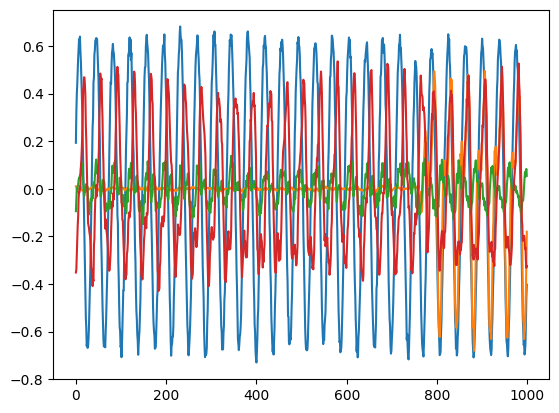

In [67]:
plt.plot(normal_temp[:1000])
plt.show()

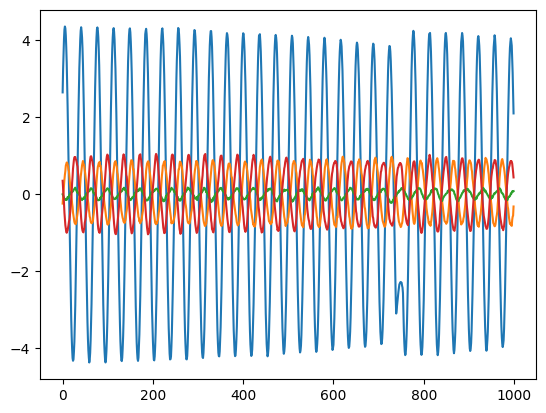

In [68]:
plt.plot(type1_temp[:1000])
plt.show()

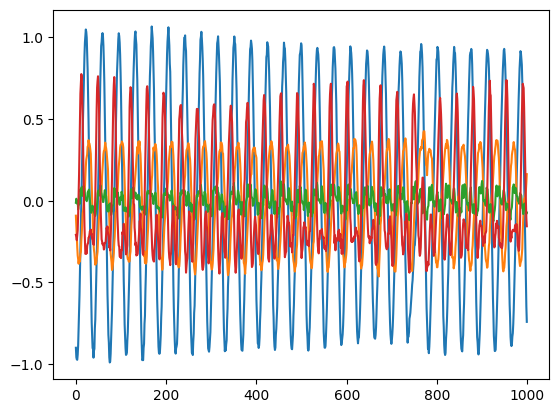

In [69]:
plt.plot(type2_temp[:1000])
plt.show()

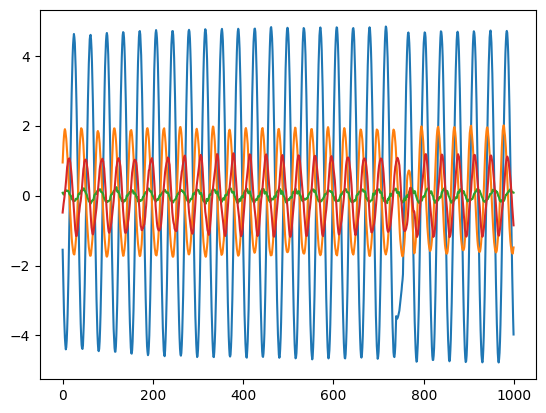

In [70]:
plt.plot(type3_temp[:1000])
plt.show()

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(normal_)
normal = scaler.transform(normal_temp)
type1 = scaler.transform(type1_temp)
type2 = scaler.transform(type2_temp)
type3 = scaler.transform(type3_temp)

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [75]:
# 데이터 분배
normal_train = normal[:][:60000]; normal_valid = normal[:][60000:80000]; normal_test = normal[:][80000:]
type1_train = type1[:][:60000]; type1_valid = type1[:][60000:80000]; type1_test = type1[:][80000:]
type2_train = type2[:][:60000]; type2_valid = type2[:][60000:80000]; type2_test = type2[:][80000:]
type3_train = type3[:][:60000]; type3_valid = type3[:][60000:80000]; type3_test = type3[:][80000:]
train = np.concatenate((normal_train,type1_train,type2_train,type3_train))
valid = np.concatenate((normal_valid,type1_valid,type2_valid,type3_valid))
test = np.concatenate((normal_test,type1_test,type2_test,type3_test))
print("train data의 형태:", train.shape)
print("valid data의 형태:", valid.shape)
print(" test data의 형태:", test.shape)

train data의 형태: (240000, 4)
valid data의 형태: (80000, 4)
 test data의 형태: (239944, 4)


In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

class LSTM(self,)